- 그냥 모델 가져와서 쓴 것 : 224,224,3으로 변경, include_top -> True로 변경

- finetuning : 224,224,3으로 변경

    => 우리데이터 사용시

# 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/alpaco/project/image_recognition/data/
# ㅇ

[Errno 2] No such file or directory: '/content/drive/MyDrive/alpaco/project/image_recognition/data/'
/content


In [4]:

pwd

'/content'

# 데이터 불러오기
- 지워진 피클파일

In [ ]:
idx2label = {0: '무증상', 1: '결막염', 2: '궤양성각막질환', 3: '백내장', 4: '비궤양성각막질환',
               5: '색소침착성각막염', 6: '안검내반증', 7: '안검염', 8: '안검종양', 9: '유루증', 10: '핵경화'}

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition/data'

In [ ]:
import pandas as pd
# 데이터 로드
img_1 = pd.read_pickle('./sample/t_u/결막염_images_224_200.pickle')
img_2 = pd.read_pickle('./sample/t_u/궤양성각막질환_images_224_200.pickle')
img_3 = pd.read_pickle('./sample/t_u/백내장_images_224_200.pickle')
img_4 = pd.read_pickle('./sample/t_u/비궤양성각막질환_images_224_200.pickle')
img_5 = pd.read_pickle('./sample/t_u/색소침착성각막염_images_224_200.pickle')
img_6 = pd.read_pickle('./sample/t_u/안검내반증_images_224_200.pickle')
img_7 = pd.read_pickle('./sample/t_u/안검염_images_224_200.pickle')
img_8 = pd.read_pickle('./sample/t_u/안검종양_images_224_200.pickle')
img_9 = pd.read_pickle('./sample/t_u/유루증_images_224_200.pickle')
img_10 = pd.read_pickle('./sample/t_u/핵경화_images_224_200.pickle')


img_m_1 = pd.read_pickle('./sample/t_m/결막염_images_224_100.pickle')
img_m_2 = pd.read_pickle('./sample/t_m/궤양성각막질환_images_224_100.pickle')
img_m_3 = pd.read_pickle('./sample/t_m/백내장_images_224_100.pickle')
img_m_4 = pd.read_pickle('./sample/t_m/비궤양성각막질환_images_224_100.pickle')
img_m_5 = pd.read_pickle('./sample/t_m/색소침착성각막염_images_224_100.pickle')
img_m_6 = pd.read_pickle('./sample/t_m/안검내반증_images_224_100.pickle')
img_m_7 = pd.read_pickle('./sample/t_m/안검염_images_224_100.pickle')
img_m_8 = pd.read_pickle('./sample/t_m/안검종양_images_224_100.pickle')
img_m_9 = pd.read_pickle('./sample/t_m/유루증_images_224_100.pickle')
img_m_10 = pd.read_pickle('./sample/t_m/핵경화_images_224_100.pickle')


print(img_1.shape, img_2.shape, img_3.shape, img_4.shape, img_5.shape, img_6.shape,img_7.shape, img_8.shape, img_9.shape, img_10.shape) 
print(img_m_1.shape, img_m_2.shape, img_m_3.shape, img_m_4.shape, img_m_5.shape, img_m_6.shape, img_m_7.shape, img_m_8.shape, img_m_9.shape, img_m_10.shape)

(100, 224, 224, 3) (200, 224, 224, 3) (300, 224, 224, 3) (200, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3)
(100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3)


In [ ]:
import numpy as np
img = np.concatenate((img_1, img_2, img_3, img_4, img_5, img_6,img_7, img_8, img_9, img_10, img_m_1, img_m_2, img_m_3, img_m_4, img_m_5, img_m_6, img_m_7, img_m_8, img_m_9, img_m_10))
img.shape

(2400, 224, 224, 3)

In [ ]:
label = np.concatenate((np.full(100, 1),np.full(200, 2),np.full(300, 3),np.full(200, 4),np.full(100, 5),np.full(100, 6),np.full(100, 7),np.full(100, 8),np.full(100, 9),np.full(100, 10),np.full(1000, 0)))
label.shape

(2400,)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(img, label, test_size=0.2, random_state=34)

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((1920, 224, 224, 3), (1920,), (480, 224, 224, 3), (480,))

In [ ]:
test_labels[100]

0

## 데이터 로드2 피클파일 지워져서 다른 데이터셋 이용
- 테스트 할때만 사용하세욤
- 외에 지워도 됌

In [ ]:
from tensorflow.keras.datasets import cifar10

# 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
 train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## 1.ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model50 = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')  
# 데스트용 실제로는 224,224,3으로 변경
# include_top : true로 변경

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
model50.summary()

In [ ]:
model50.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')



In [ ]:
model50.evaluate(test_images, test_labels) 

15/15 [==============================] - 12s 91ms/step - loss: 13.5348 - accuracy: 0.0000e+00


[13.534789085388184, 0.0]

### 1) fine_tuning한것

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50


## 일부 재학습 모델
base_model50 = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

# base_model.trainable = False

# for layer in base_model.layers[-10:]: 
#     layer.trainable = True				

base_model50.trainable = True

for layer in base_model50.layers[:-10]:
    layer.trainable = False			

for layer in base_model50.layers[:]:	
  print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model50(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model50.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model_res50 = tf.keras.Model(inputs, outputs)


input_4 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

#### (1) sparse_categorical_crossentropy

In [ ]:
model_res50.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5)


# 모델 fitting
history = model_res50.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels), callbacks = [earlystopping], batch_size=125)

Epoch 1/100
16/16 [==============================] - 13s 558ms/step - loss: 2.1903 - accuracy: 0.3792 - val_loss: 1.4208 - val_accuracy: 0.5271
Epoch 2/100
16/16 [==============================] - 7s 446ms/step - loss: 1.4839 - accuracy: 0.5089 - val_loss: 1.4305 - val_accuracy: 0.5271
Epoch 3/100
16/16 [==============================] - 9s 550ms/step - loss: 1.3497 - accuracy: 0.5292 - val_loss: 1.2703 - val_accuracy: 0.5479
Epoch 4/100
16/16 [==============================] - 9s 563ms/step - loss: 1.2424 - accuracy: 0.5682 - val_loss: 1.2336 - val_accuracy: 0.5771
Epoch 5/100
16/16 [==============================] - 8s 538ms/step - loss: 1.1815 - accuracy: 0.5771 - val_loss: 1.2377 - val_accuracy: 0.5521
Epoch 6/100
16/16 [==============================] - 9s 544ms/step - loss: 1.1362 - accuracy: 0.5875 - val_loss: 1.2749 - val_accuracy: 0.5729
Epoch 7/100
16/16 [==============================] - 9s 565ms/step - loss: 1.0653 - accuracy: 0.6146 - val_loss: 1.2414 - val_accuracy: 0.581

- sparse_categorical_crossentropy로 그냥 사용하던가
- categorical crossentropy + one_hot으로 하는 방법
    - y_train = tf.keras.utils.to_categorical(train_labels, 10)
    - y_test = tf.keras.utils.to_categorical(test_labels, 10)
    - y_train.shape, y_test.shape
    
첫번째 방법 사용

In [ ]:
model_res50.evaluate(test_images, test_labels) 

15/15 [==============================] - 1s 96ms/step - loss: 1.2113 - accuracy: 0.6062


[1.211284875869751, 0.606249988079071]

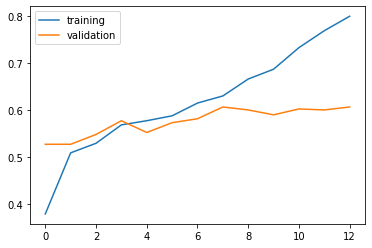

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

#### (2) categorical crossentropy + one_hot

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, 11)
y_test = tf.keras.utils.to_categorical(test_labels, 11)
y_train.shape, y_test.shape

((1920, 11), (480, 11))

In [ ]:
model_res50.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5)

# 모델 fitting
model_res50.fit(train_images, y_train, epochs = 100, validation_data=(test_images, y_test),callbacks = [earlystopping], batch_size=125)

model_res50.evaluate(test_images, y_test) 

Epoch 1/100
16/16 [==============================] - 14s 599ms/step - loss: 0.8976 - accuracy: 0.6766 - val_loss: 1.2089 - val_accuracy: 0.6000
Epoch 2/100
16/16 [==============================] - 9s 581ms/step - loss: 0.8377 - accuracy: 0.6859 - val_loss: 1.2463 - val_accuracy: 0.6042
Epoch 3/100
16/16 [==============================] - 8s 508ms/step - loss: 0.8051 - accuracy: 0.7026 - val_loss: 1.2405 - val_accuracy: 0.6042
Epoch 4/100
16/16 [==============================] - 8s 498ms/step - loss: 0.7798 - accuracy: 0.7250 - val_loss: 1.2523 - val_accuracy: 0.6021
Epoch 5/100
16/16 [==============================] - 9s 561ms/step - loss: 0.7584 - accuracy: 0.7109 - val_loss: 1.3249 - val_accuracy: 0.6021
Epoch 6/100
15/15 [==============================] - 1s 96ms/step - loss: 1.2089 - accuracy: 0.6000


[1.2088788747787476, 0.6000000238418579]

1) include_top = True, 분류기(완전연결계층) 여부  
2) weights = 'imagenet', 사전학습 weight 여부  
3) input_shape, Input 사이즈 (32, 32, 3)으로 변경

In [ ]:
# 모델 저장
model_res50.save('model_res50.h5')


### inference

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


class_names = {0: '무증상', 1: '결막염', 2: '궤양성각막질환', 3: '백내장', 4: '비궤양성각막질환',
               5: '색소침착성각막염', 6: '안검내반증', 7: '안검염', 8: '안검종양', 9: '유루증', 10: '핵경화'}

# 모델 로드
#model = tf.keras.models.load_model('model_res50.h5')
model_res50
# 이미지 전처리
img = load_img('/content/강아지_안검염_1.jpg', target_size=(224, 224))
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 추론
predictions = model_res50.predict(img_array)


# 예측 클래스 결정
predicted_class = np.argmax(predictions, axis=-1)
class_name = class_names[predicted_class[0]]

# 출력
print(f'예측된 클래스: {class_name}인 것 같습니다')
print(f'클래스별 확률: {predictions[0]}')

1/1 [==============================] - 0s 45ms/step
예측된 클래스: 비궤양성각막질환인 것 같습니다
클래스별 확률: [0.01341122 0.13537318 0.08665756 0.23093262 0.2961122  0.0331552
 0.01732756 0.06957205 0.03430877 0.01309246 0.07005714]


## 2.ResNet101

In [ ]:
from tensorflow.keras.applications.resnet import ResNet101

model101 = ResNet101(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

model101.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

model101.evaluate(test_images, test_labels) 

313/313 [==============================] - 13s 29ms/step - loss: 18.7577 - accuracy: 6.5678e-05


[18.75774574279785, 6.567754462594166e-05]

### 1) fine_tuning

In [ ]:

## 일부 재학습 모델
# 출력층 10개 분류 모델로 변경경
base_model101 = ResNet101(include_top=False, input_shape = (32,32 ,3), weights = 'imagenet')

# base_model.trainable = False

# for layer in base_model.layers[-10:]: 
#     layer.trainable = True				

base_model101.trainable = True

for layer in base_model101.layers[:-10]:
    layer.trainable = False			

for layer in base_model101.layers[:]:	
  print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(32, 32, 3))

x = base_model101(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model101.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_res101 = tf.keras.Model(inputs, outputs)


input_5 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

- 실제 데이터셋일땐 인클루드 탑 True 변경 후 input_shape = 224,224,3

#### (1) sparse_categorical_crossentropy

In [ ]:
#### sparse_categorical_crossentropy

model_res101.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_res101.fit(train_images, train_labels, epochs = 5, validation_data=(test_images, test_labels), batch_size=125)

Epoch 1/5
400/400 [==============================] - 27s 47ms/step - loss: 0.9227 - accuracy: 0.6790 - val_loss: 1.0892 - val_accuracy: 0.6263
Epoch 2/5
400/400 [==============================] - 15s 38ms/step - loss: 0.8464 - accuracy: 0.7044 - val_loss: 1.1044 - val_accuracy: 0.6387
Epoch 3/5
400/400 [==============================] - 15s 37ms/step - loss: 0.7621 - accuracy: 0.7345 - val_loss: 1.1370 - val_accuracy: 0.6314
Epoch 4/5
400/400 [==============================] - 14s 35ms/step - loss: 0.6868 - accuracy: 0.7595 - val_loss: 1.2012 - val_accuracy: 0.6365
Epoch 5/5
400/400 [==============================] - 14s 35ms/step - loss: 0.6143 - accuracy: 0.7829 - val_loss: 1.2315 - val_accuracy: 0.6293


#### (2) categorical crossentropy + one_hot

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)
y_train.shape, y_test.shape

In [ ]:
model_res101.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_res101.fit(train_images, y_train, epochs = 5, validation_data=(test_images, y_test), batch_size=125)

model_res101.evaluate(test_images, y_test) 

Epoch 1/5
400/400 [==============================] - 23s 40ms/step - loss: 0.5390 - accuracy: 0.8099 - val_loss: 1.3441 - val_accuracy: 0.6320
Epoch 2/5
400/400 [==============================] - 15s 37ms/step - loss: 0.4639 - accuracy: 0.8357 - val_loss: 1.4535 - val_accuracy: 0.6327
Epoch 3/5
400/400 [==============================] - 15s 37ms/step - loss: 0.4033 - accuracy: 0.8547 - val_loss: 1.5883 - val_accuracy: 0.6263
Epoch 4/5
400/400 [==============================] - 14s 35ms/step - loss: 0.3640 - accuracy: 0.8702 - val_loss: 1.7337 - val_accuracy: 0.6179
Epoch 5/5
313/313 [==============================] - 9s 22ms/step - loss: 1.7380 - accuracy: 0.6220


[1.7379937171936035, 0.621999979019165]

## 3.ResNet152

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152

model152 = ResNet152(include_top=False, input_shape=(32, 32, 3), weights='imagenet')


In [ ]:
model152.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model152.evaluate(test_images, test_labels) 

313/313 [==============================] - 19s 38ms/step - loss: 19.1058 - accuracy: 5.4419e-04


[19.10580062866211, 0.0005441853427328169]

###  1) fine-tunning

In [ ]:
base_model.output_shape

(None, 1, 1, 2048)

#### (1) sparse_categorical_crossentropy

In [ ]:
## 일부 재학습 모델
base_model152 = ResNet152(include_top=False, input_shape = (32,32 ,3), weights = 'imagenet')

# base_model.trainable = False

# for layer in base_model.layers[-10:]: 
#     layer.trainable = True				

base_model152.trainable = True

for layer in base_model152.layers[:-10]: 
    layer.trainable = False				


inputs = tf.keras.Input(shape=(32, 32, 3))

x = base_model152(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model152.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_res152 = tf.keras.Model(inputs, outputs)


In [ ]:
model_res152.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_res152.fit(train_images, train_labels, epochs = 5, validation_data=(test_images, test_labels), batch_size=125)

Epoch 1/5
400/400 [==============================] - 38s 66ms/step - loss: 1.9022 - accuracy: 0.4031 - val_loss: 1.2845 - val_accuracy: 0.5518
Epoch 2/5
400/400 [==============================] - 21s 54ms/step - loss: 1.3128 - accuracy: 0.5424 - val_loss: 1.1706 - val_accuracy: 0.5897
Epoch 3/5
400/400 [==============================] - 22s 54ms/step - loss: 1.1751 - accuracy: 0.5946 - val_loss: 1.1205 - val_accuracy: 0.6127
Epoch 4/5
400/400 [==============================] - 22s 55ms/step - loss: 1.0787 - accuracy: 0.6266 - val_loss: 1.0715 - val_accuracy: 0.6284
Epoch 5/5
400/400 [==============================] - 19s 48ms/step - loss: 0.9910 - accuracy: 0.6567 - val_loss: 1.0656 - val_accuracy: 0.6339


#### (2) categorical crossentropy + one_hot

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [ ]:
model_res152.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_res152.fit(train_images, y_train, epochs = 5, validation_data=(test_images, y_test), batch_size=125)

model_res152.evaluate(test_images, y_test) 

Epoch 1/5
400/400 [==============================] - 39s 68ms/step - loss: 0.9058 - accuracy: 0.6843 - val_loss: 1.0692 - val_accuracy: 0.6408
Epoch 2/5
400/400 [==============================] - 22s 55ms/step - loss: 0.8302 - accuracy: 0.7081 - val_loss: 1.0735 - val_accuracy: 0.6423
Epoch 3/5
400/400 [==============================] - 22s 55ms/step - loss: 0.7468 - accuracy: 0.7383 - val_loss: 1.1283 - val_accuracy: 0.6398
Epoch 4/5
400/400 [==============================] - 22s 55ms/step - loss: 0.6665 - accuracy: 0.7645 - val_loss: 1.1716 - val_accuracy: 0.6406
Epoch 5/5
313/313 [==============================] - 13s 32ms/step - loss: 1.2273 - accuracy: 0.6389


[1.2272547483444214, 0.6388999819755554]

# 돌려보고 싶은데 데이터셋이 지워져서 못돌림 224,224,3이 필요

## 4.mobile net v1 - 28개층

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet

# 모델 로드 224x224사이즈 크기의 이미지만 가능
modelv1 = MobileNet(include_top=True, input_shape = (224,224 ,3), weights='imagenet')

# 이미지 전처리
#img = tf.keras.preprocessing.image.load_img('image.jpg', target_size=(224, 224))
#img_array = tf.keras.preprocessing.image.img_to_array(img)
#img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)
#img_array = tf.expand_dims(img_array, axis=0)

modelv1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

# 추론
modelv1.evaluate(test_images, test_labels) 

InvalidArgumentError: ignored

- MobileNet은 tensorflow.keras.applications.mobilenet 패키지에 포함된 MobileNet V1 모델. 
- ImageNet 데이터셋에서 사전 학습된 가중치를 가지고 있으며, 224x224 크기의 입력 이미지를 처리할 수 있

### 1) fine_tuning

In [ ]:
## 일부 재학습 모델
# 출력층 10개 분류 모델로 변경경
base_modelv1 = MobileNet(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

base_modelv1.trainable = True

for layer in base_modelv1.layers[:-10]:
    layer.trainable = False			

for layer in base_modelv1.layers[:]:	
    print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_modelv1(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_modelv1.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_mov1 = tf.keras.Model(inputs, outputs)



NameError: ignored

#### (1) sparse_categorical_crossentropy

In [ ]:
#### sparse_categorical_crossentropy

model_mov1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
model_mov1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), batch_size=125)


#### (2) categorical crossentropy + one_hot

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)
y_train.shape, y_test.shape

model_mov1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_mov1.fit(train_images, y_train, epochs = 5, validation_data=(test_images, y_test), batch_size=125)

model_mov1.evaluate(test_images, y_test) 

## 5.mobile net v2 - 53개층

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


# 모델 로드
modelv2 = MobileNetV2(include_top=True, input_shape = (224,224 ,3), weights='imagenet')

# 이미지 전처리
#img = tf.keras.preprocessing.image.load_img('image.jpg', target_size=(224, 224))
#img_array = tf.keras.preprocessing.image.img_to_array(img)
#img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)
#img_array = tf.expand_dims(img_array, axis=0)

modelv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

# 추론
modelv2.evaluate(test_images, test_labels) 

### 1) fine_tuning

In [ ]:
## 일부 재학습 모델
# 출력층 10개 분류 모델로 변경경
base_modelv2 = MobileNet(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

base_modelv2.trainable = True

for layer in base_modelv2.layers[:-10]:
    layer.trainable = False			

for layer in base_modelv2.layers[:]:	
    print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_modelv2(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_modelv2.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_mov2 = tf.keras.Model(inputs, outputs)



#### (1) sparse_categorical_crossentropy

In [ ]:
#### sparse_categorical_crossentropy

model_mov2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
model_mov2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), batch_size=125)


#### (2) categorical crossentropy + one_hot

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)
y_train.shape, y_test.shape

model_mov2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
model_mov2.fit(train_images, y_train, epochs = 5, validation_data=(test_images, y_test), batch_size=125)

model_mov2.evaluate(test_images, y_test) 